# Pandas 시각화
판다스 자체적으로 matplotlib 를 기반으로 한 시각화기능을 지원한다.    
Series나 DataFrame에 plot() 함수나 plot accessor를 사용한다.
- https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

- 기본구문
    - (Series/DataFrame).plot(kind='그래프종류')
    - (Series/DataFrame).plot.그래프함수()

## plot() 
- kind 매개변수에 지정한 값에 따라 다양한 그래프를 그릴 수 있다.
- kind : 그래프 종류 지정
    - 'line' : line plot (default)
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot
    - 'pie' : pie plot
    - 'scatter' : scatter plot

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
s = pd.Series([100, 70, 90, 130, 50], index=['사과', '배', '귤', '수박', '복숭아'])
s

사과     100
배       70
귤       90
수박     130
복숭아     50
dtype: int64

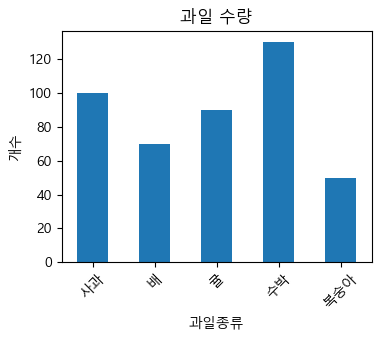

In [19]:
s.plot(kind='bar', title='과일 수량', xlabel='과일종류', ylabel='개수', figsize=(4,3), rot=45)  # 판다스
plt.show()

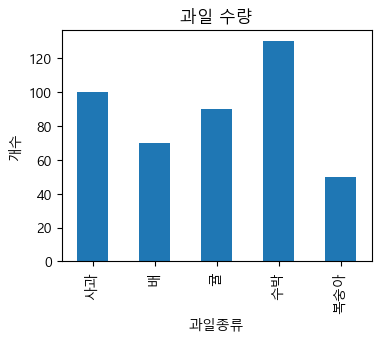

In [18]:
s.plot.bar(title='과일 수량', xlabel='과일종류', ylabel='개수', figsize=(4,3))
plt.show()

matplotlib를 이용해 여러 설정들 가능

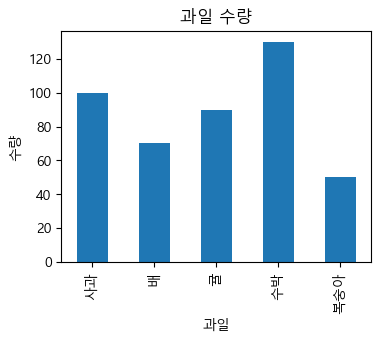

In [22]:
plt.figure(figsize=(4,3)) # 버전이 업그레이드 되면서 밖에서도 설정할 수 있다.
s.plot(kind='bar')  # 판다스
plt.title('과일 수량') # matplotlib으로 설정
plt.xlabel("과일")
plt.ylabel('수량')
plt.show()

## 막대 그래프
- index가 무슨 값인지를 가리키는 축으로 사용된다.

In [20]:
tips=pd.read_csv("data/tips.csv")
tips.shape

(244, 7)

In [21]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [68]:
cnt_result = tips['day'].value_counts()
cnt_result

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

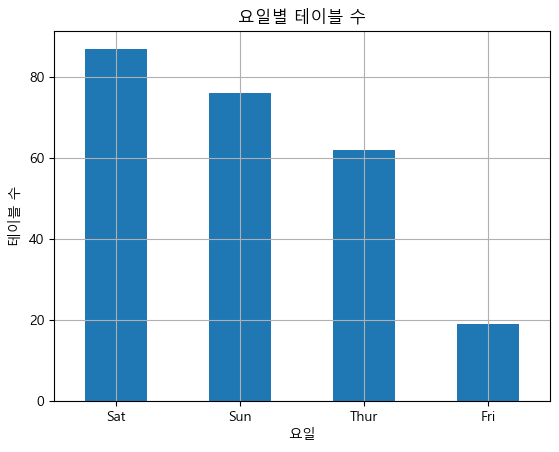

In [27]:
cnt_result.plot(kind='bar', title="요일별 테이블 수", xlabel='요일', ylabel='테이블 수', grid=True, rot=0)
plt.show()

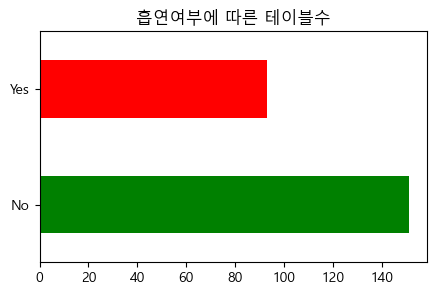

In [32]:
tips['smoker'].value_counts().plot(kind='barh', figsize=(5, 3), title='흡연여부에 따른 테이블수', color=['g', 'r'])
plt.show()

- 두개의 분류 별로 그리기
    - 여러개의 컬럼일 경우 수평 누적 막대그래프를 그린다.


In [41]:
agg_df = tips.pivot_table(index='smoker', columns='sex', values='tip', aggfunc='count') # tip을 낸 사람 수 세기
agg_df

sex,Female,Male
smoker,,
No,54,97
Yes,33,60


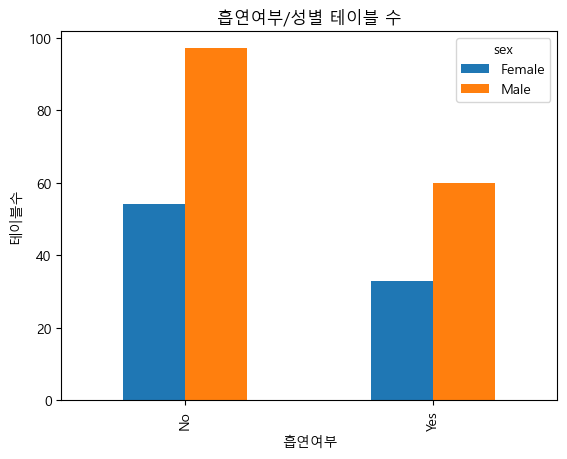

In [42]:
agg_df.plot(kind='bar', title='흡연여부/성별 테이블 수', xlabel='흡연여부', ylabel='테이블수')
plt.show()

In [64]:
# 요일/성별 손님의 총수(size)
agg_df = tips.pivot_table(index='sex', columns='day', values='size', aggfunc='sum')
agg_df

day,Fri,Sat,Sun,Thur
sex,,,,
Female,19,63,53,79
Male,21,156,163,73


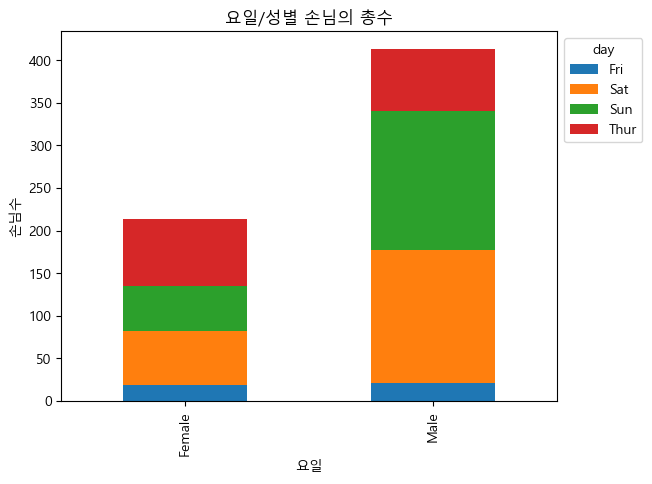

In [66]:
agg_df.plot(kind= 'bar', title='요일/성별 손님의 총수', xlabel='요일', ylabel='손님수', stacked=True)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', title='day') # legend 설정은 밖에서 해주어야 한다.
plt.show()

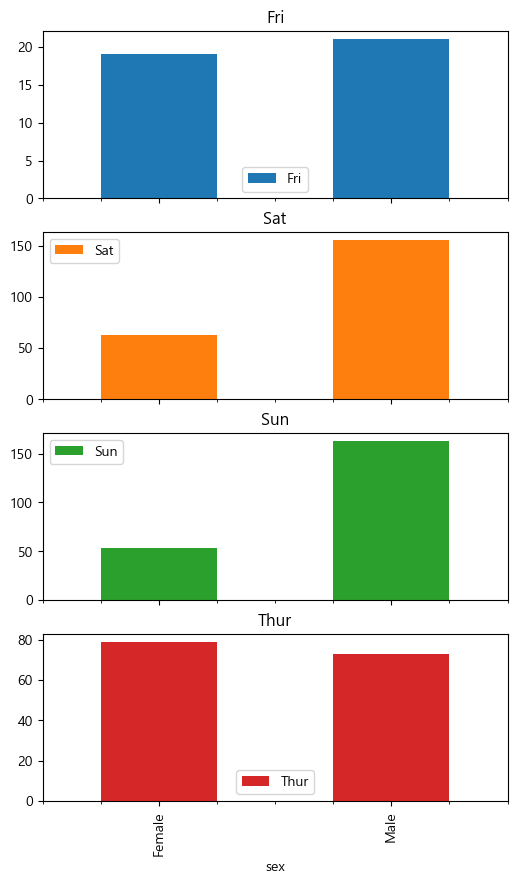

In [72]:
agg_df.plot(kind='bar', subplots=True, figsize=(6, 10))
plt.show()

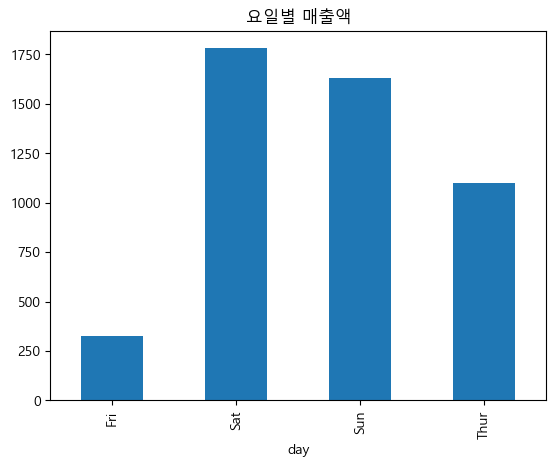

In [73]:
tips.groupby('day')['total_bill'].sum().plot(kind='bar', title='요일별 매출액')
plt.show()

## 파이차트

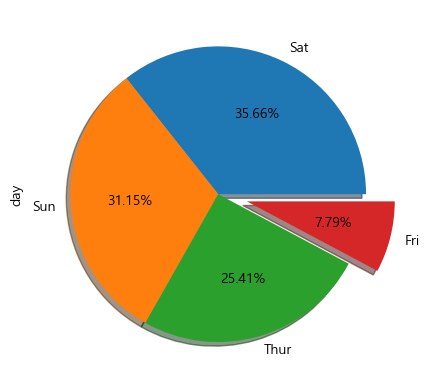

In [76]:
tips['day'].value_counts().plot(kind='pie', autopct='%.2f%%', explode=[0, 0, 0, 0.2], shadow=True)
# index: label
# value: 비율계산
plt.show()

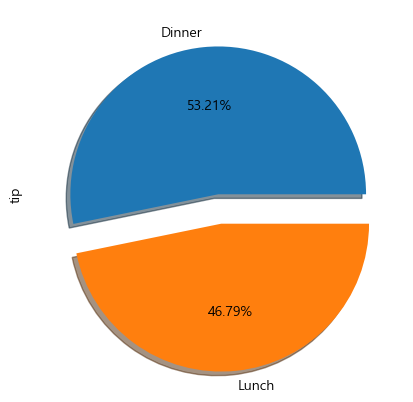

In [79]:
tips.groupby('time')['tip'].mean().plot.pie(autopct='%.2f%%', shadow=True, explode=[0, 0.2])
plt.show()

## 히스토그램, KDE(밀도그래프)

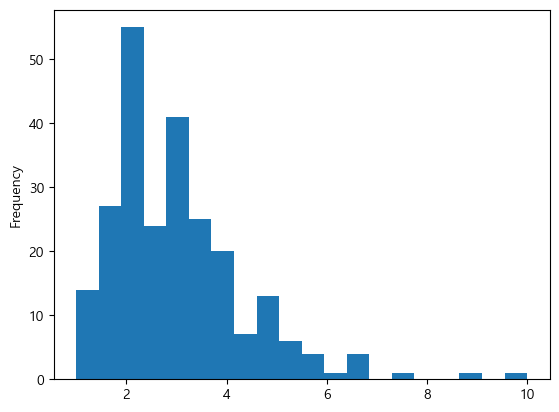

In [86]:
# tips['tip'].plot(kind='hist', bins=20)
tips['tip'].plot.hist(bins=20)
plt.show()

In [87]:
!pip install scipy

     --------------------------------------- 42.5/42.5 MB 15.6 MB/s eta 0:00:00


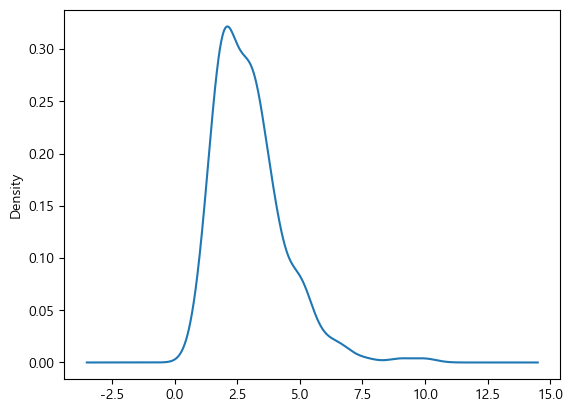

In [89]:
# tips['tip'].plot(kind='kde')
tips['tip'].plot.kde()
plt.show()

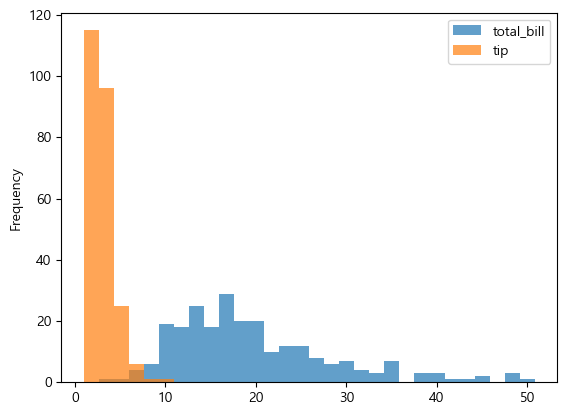

In [92]:
tips[['total_bill', 'tip']].plot(kind='hist', bins=30, alpha=0.7)
plt.show()

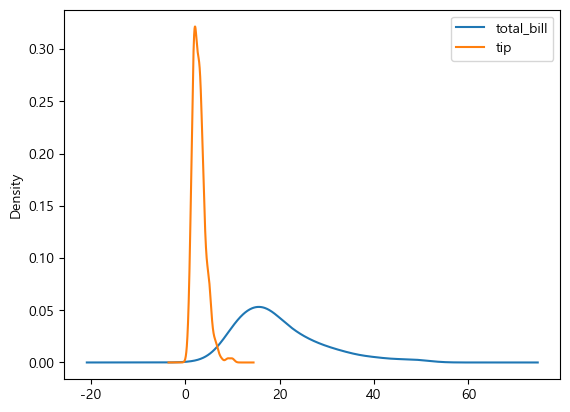

In [94]:
tips[['total_bill', 'tip']].plot(kind='kde')
plt.show()

## Boxplot (상자그래프)

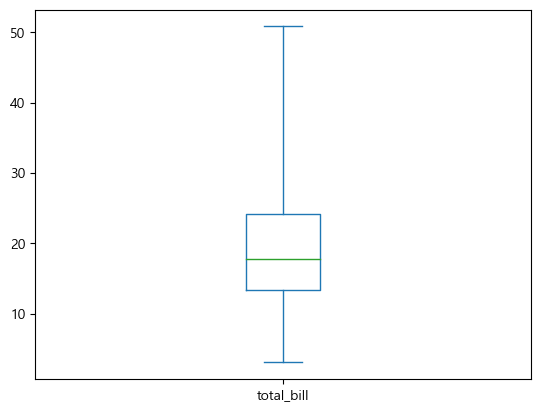

In [97]:
tips['total_bill'].plot(kind='box', whis=3)
plt.show()

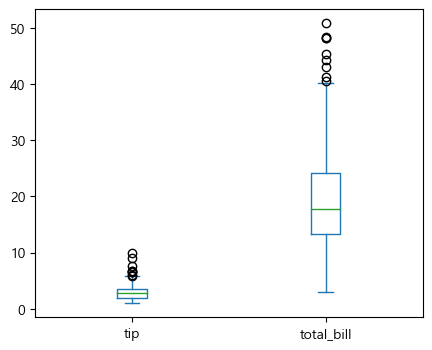

In [101]:
tips[['tip', 'total_bill']].plot(kind='box', figsize=(5,4))
plt.show()

## scatter plot (산점도) 

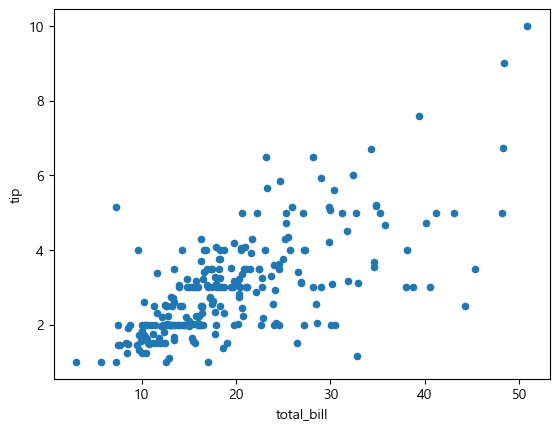

In [102]:
# DataFrame을 이용해서 그린다. (Series는 그릴 수 없다.)
tips.plot(kind='scatter', x='total_bill', y='tip')
plt.show()

In [103]:
tips[['total_bill', 'tip']].corr()

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


## line plot

In [133]:
df = pd.read_excel('data/강수량.xlsx')
# df = df.set_index('계절').T
df = df.set_index(df.columns[0]).T

In [134]:
df

계절,봄,여름,가을,겨울
2009,231.3,752.0,143.1,142.3
2010,302.9,692.6,307.6,98.7
2011,256.9,1053.6,225.5,45.6
2012,256.5,770.6,363.5,139.3
2013,264.3,567.5,231.2,59.9
2014,215.9,599.8,293.1,76.9
2015,223.2,387.1,247.7,109.1
2016,312.8,446.2,381.6,108.1
2017,118.6,609.7,172.5,75.6


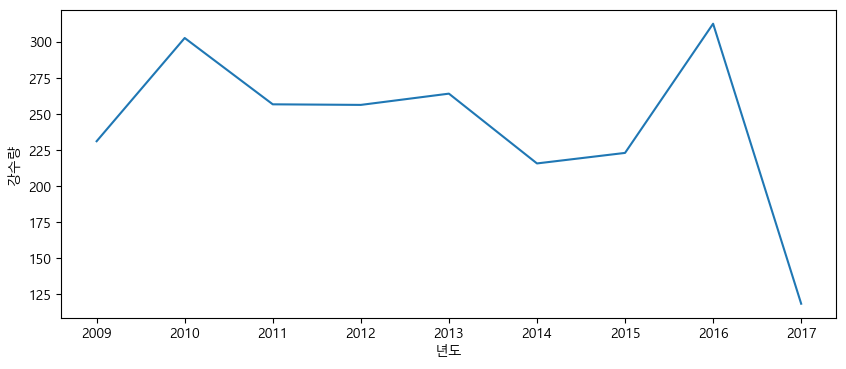

In [109]:
# 변화의 기준: index, 변화량: value
df['봄'].plot(kind='line', figsize=(10, 4), xlabel = "년도", ylabel='강수량')  # kind='line'  (default)
plt.show()

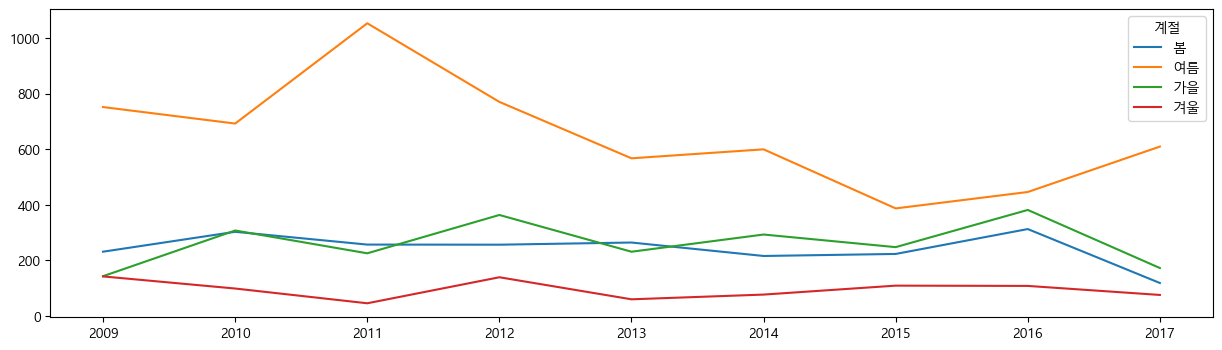

In [112]:
# dataframe.plot()
df.plot(figsize=(15, 4))
plt.show()

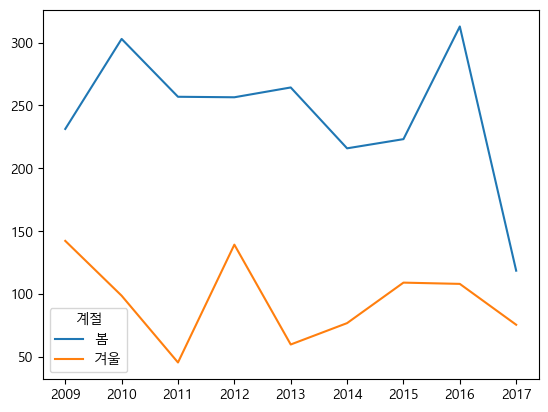

In [115]:
df[['봄', '겨울']].plot()
plt.show()